In [1]:
from langchain_experimental.text_splitter import SemanticChunker
from langchain_huggingface import HuggingFaceEmbeddings

embedding_model = HuggingFaceEmbeddings(model_name="intfloat/multilingual-e5-large-instruct")

/Users/peerasit/senior_project/STELLA-Backend/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [46]:
import pdfplumber
from langchain_core.documents import Document

file_name = "../../chunking/pdfs/general/Thailand_INDCs_2015.pdf"
with pdfplumber.open(file_name) as pdf:
    page_size = len(pdf.pages)
    
    buffer = []
    for i in range(1, page_size):
        p = pdf.pages[i]
        buffer.append(p.extract_text())
        # print(i, p.find_tables())
        # buffer += '\n====\n'




In [48]:
print(buffer)

["Submission by Thailand\nIntended Nationally Determined Contribution and Relevant Information\nAs a developing country highly vulnerable to the impacts of climate change, Thailand attaches\ngreat importance to the global efforts to address this common and pressing challenge. Pursuant to\ndecisions 1/CP.19 and 1/CP.20, Thailand hereby communicates its intended nationally determined\ncontribution (INDC) and the relevant information.\nThailand intends to reduce its greenhouse gas emissions by 20 percent from the\nprojected business-as-usual (BAU) level by 2030.\nThe level of contribution could increase up to 25 percent, subject to adequate and\nenhanced access to technology development and transfer, financial resources and\ncapacity building support through a balanced and ambitious global agreement under\nthe United Nations Framework Convention on Climate Change (UNFCCC).\nAccompanying information\nBaseline: Business-as-usual projection from reference year 2005 in the\nabsence of major c

In [49]:
len(buffer)

6

In [90]:
# import pymupdf
# from langchain_core.documents import Document

semantic_chunker = SemanticChunker(embeddings=embedding_model, breakpoint_threshold_type="percentile")
# text_chunks = semantic_chunker.create_documents([d.get_text() for d in doc])
text_chunks = semantic_chunker.create_documents(buffer)

In [91]:
for i in text_chunks:
    print(len(i.page_content))

1879
322
300
2147
1389
1084
1576
2700
1046
298
3051
456
2303
1125


In [81]:

from semantic_router.splitters import RollingWindowSplitter
from semantic_router.encoders import HuggingFaceEncoder, FastEmbedEncoder
from semantic_router.utils.logger import logger

logger.setLevel("WARNING")  # reduce logs from splitter

splitter = RollingWindowSplitter(
    encoder=HuggingFaceEncoder(name="intfloat/multilingual-e5-large-instruct"),
    threshold_adjustment=0.1,
    dynamic_threshold=True,
    min_split_tokens=1000,
    max_split_tokens=1500,
    window_size=5,
    plot_splits=True,  # set this to true to visualize chunking
    enable_statistics=True  # to print chunking stats
)

/var/folders/q9/hwdmz75n1bqdzhb58dz4q95c0000gn/T/ipykernel_68204/1384323041.py:7: UserWarning: Splitters are being deprecated. They have moved to their own package. Please migrate to the `semantic-chunkers` package. More information can be found at:
https://github.com/aurelio-labs/semantic-chunkers
  splitter = RollingWindowSplitter(


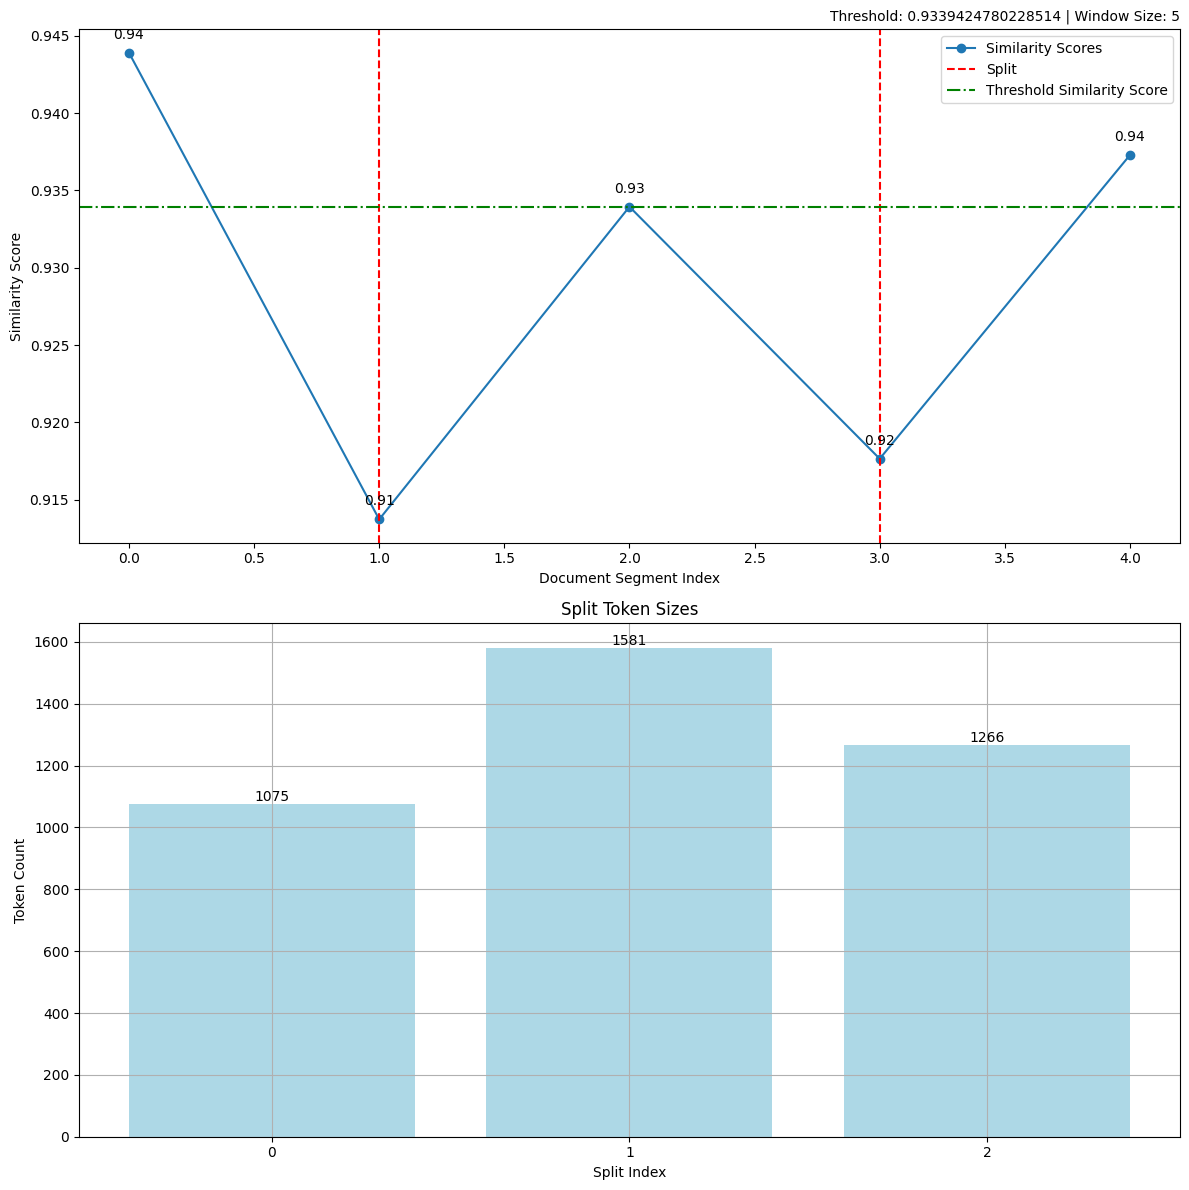

Splitting Statistics:
  - Total Documents: 6
  - Total Splits: 3
  - Splits by Threshold: 1
  - Splits by Max Chunk Size: 1
  - Last Split: 1
  - Minimum Token Size of Split: 1075
  - Maximum Token Size of Split: 1581
  - Similarity Split Ratio: 0.33


In [82]:
result = splitter(buffer)

In [83]:
len(result[0].docs[0])

2202

In [84]:
for i in result:
    print(len(i.docs[0]))

2202
4051
3508
